In [1]:
import os
from pathlib import Path
from pyralysis.transformers import Gridder, HermitianSymmetry
from pyralysis.convolution import Bicubic, PSWF1, Spline, Pillbox, Gaussian, GaussianSinc, Sinc, KaiserBessel
from pyralysis.estimators import Degridding, BilinearInterpolation, NearestNeighbor
from pyralysis.io.fits import FITS
from pyralysis.io import DaskMS
from pyralysis.models import PowerLawIntensityModel
import astropy.units as un
import matplotlib.pyplot as plt
import dask.array as da
import numpy as np

In [2]:
m87 = str(Path(os.path.abspath("__file__")).parents[1]) + "/datasets/M87/"
selfcalband9 = str(Path(os.path.abspath("__file__")).parents[1]) + "/datasets/selfcalband9/"
freq78 = str(Path(os.path.abspath("__file__")).parents[1]) + "/datasets/FREQ78/"
co65 = str(Path(os.path.abspath("__file__")).parents[1]) + "/datasets/co65/"
antennae = str(Path(os.path.abspath("__file__")).parents[1]) + "/datasets/antennae/"
file_dict = {
    0: m87 + 'SR1_M87_2017_101_hi_hops_netcal_StokesI.selfcal.LLRR.ms',
    1: m87 + 'SR1_M87_2017_101_lo_hops_netcal_StokesI.selfcal.LLRR.ms',
    2: m87 + 'SR1_M87_2017_101_hilo_hops_netcal_StokesI.selfcal.final.ms',
    3: selfcalband9 + 'hd142_b9cont_self_tav.ms',
    4: freq78 + "FREQ78.ms",
    5: co65 + "co65.ms",
    6: antennae + "all_fields.ms",
}

file_dataset = file_dict[3]
file_dataset

'/home/miguel/Documents/pyralysis/datasets/selfcalband9/hd142_b9cont_self_tav.ms'

In [3]:
ds = DaskMS(input_name=file_dataset)
dataset = ds.read(filter_flag_column=False, calculate_psf=False)

In [4]:
fits_io = FITS(input_name="/home/miguel/Downloads/Einstein.fits")
image = fits_io.read()
#cs = image.data.attrs["CDELT1"] * un.deg
cs = dataset.theo_resolution / 7
image.cellsize = cs

/home/miguel/Documents/pyralysis/src/pyralysis/reconstruction/image.py:60: UserWarning: The image provided does not contain RADESYS keyword in header. Phase center coordinates will be assumed to be in ICRS.
  warnings.warn(
/home/miguel/Documents/pyralysis/src/pyralysis/reconstruction/image.py:76: UserWarning: The image provided has invalid CRPIX keywords in header. Default values will be used instead.
  warnings.warn(


In [ ]:
oversampling_factor = 3
size = 3

spline_kernel = Spline(size=size, cellsize=cs, oversampling_factor=oversampling_factor)
bicubic_kernel = Bicubic(size=size, cellsize=cs, oversampling_factor=oversampling_factor)
pswf1_kernel = PSWF1(size=size, cellsize=cs, oversampling_factor=oversampling_factor)
gaussian_kernel = Gaussian(size=size, cellsize=cs, oversampling_factor=oversampling_factor)
gaussian_sinc_kernel = GaussianSinc(size=size, cellsize=cs, oversampling_factor=oversampling_factor)
sinc_kernel = Sinc(size=size, cellsize=cs, oversampling_factor=oversampling_factor)
pillbox_kernel = Pillbox(size=size, cellsize=cs, oversampling_factor=oversampling_factor)
kaiser_bessel_kernel = KaiserBessel(size=size, cellsize=cs, oversampling_factor=oversampling_factor)

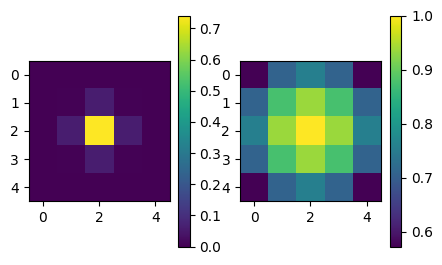

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))

p1 = axes[0].imshow(pillbox_kernel.kernel((5, 5)).real)
p2 = axes[1].imshow(pillbox_kernel.gcf((5, 5)))
plt.colorbar(p1, ax=axes[0])
plt.colorbar(p2, ax=axes[1])

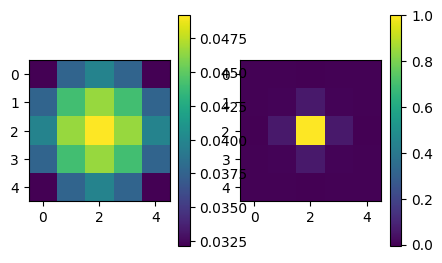

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))

p1 = axes[0].imshow(spline_kernel.kernel((5, 5)).real)
p2 = axes[1].imshow(spline_kernel.gcf((5, 5)))

plt.colorbar(p1, ax=axes[0])
plt.colorbar(p2, ax=axes[1])

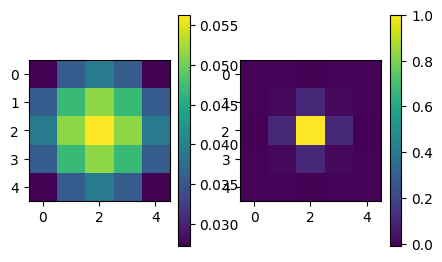

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))

p1 = axes[0].imshow(bicubic_kernel.kernel((5, 5)).real)
p2 = axes[1].imshow(bicubic_kernel.gcf((5, 5)))

plt.colorbar(p1, ax=axes[0])
plt.colorbar(p2, ax=axes[1])

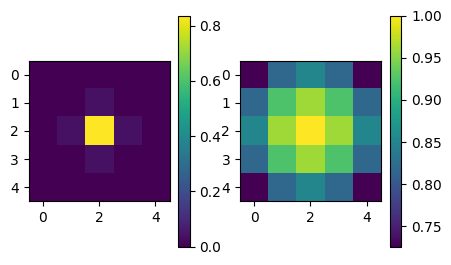

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))

p1 = axes[0].imshow(gaussian_kernel.kernel((5, 5)).real)
p2 = axes[1].imshow(gaussian_kernel.gcf((5, 5)))

plt.colorbar(p1, ax=axes[0])
plt.colorbar(p2, ax=axes[1])

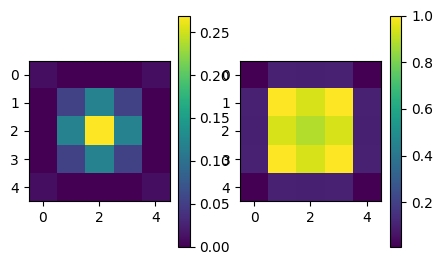

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))

p1 = axes[0].imshow(gaussian_sinc_kernel.kernel((5, 5)).real)
p2 = axes[1].imshow(gaussian_sinc_kernel.gcf((5, 5)))

plt.colorbar(p1, ax=axes[0])
plt.colorbar(p2, ax=axes[1])

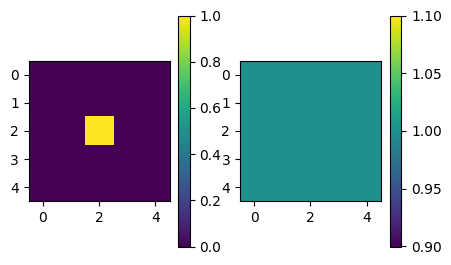

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))

p1 = axes[0].imshow(sinc_kernel.kernel((5, 5)).real)
p2 = axes[1].imshow(sinc_kernel.gcf((5, 5)))

plt.colorbar(p1, ax=axes[0])
plt.colorbar(p2, ax=axes[1])

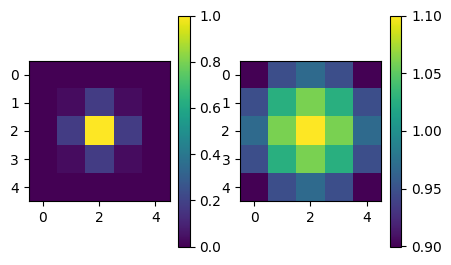

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))

axes[0].imshow(pswf1_kernel.kernel((5, 5)).real)
axes[1].imshow(pswf1_kernel.gcf((5, 5)))

plt.colorbar(p1, ax=axes[0])
plt.colorbar(p2, ax=axes[1])

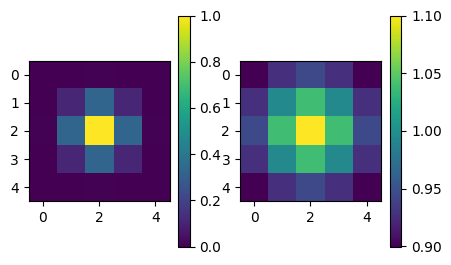

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))

axes[0].imshow(kaiser_bessel_kernel.kernel((5, 5)).real)
axes[1].imshow(kaiser_bessel_kernel.gcf((5, 5)))

plt.colorbar(p1, ax=axes[0])
plt.colorbar(p2, ax=axes[1])

In [14]:
freq = [dataset.spws.min_nu.value]
pb = dataset.antenna.primary_beam
pointings = dataset.field.phase_direction_cosines[0:2]
pointings_cartesian = (pointings / cs).value
beams = da.array(
    [
        pb.beam(
            frequency=freq,
            imsize=image.data.shape,
            cellsize=cs,
            antenna=np.array([0]),  # Token antenna, for default mask
            x_0=pointings[0][i].value,
            y_0=pointings[1][i].value,
            imcenter=(image.center_pixel[0], image.center_pixel[1])
        ) for i in range(pointings.shape[-1])
    ]
)
beam = da.sum(beams, axis=(0, 1, 2))
normalized_beam = beam / da.max(beam)

dims = ["x", "y"]
inverse_beam = (1 / normalized_beam).compute()  # The same as squeeze

th = np.percentile(inverse_beam, 20)
print(th)
print(da.max(beam).compute())

1.237937331199646
1.0


In [15]:
plt.imshow(normalized_beam, origin="lower")
plt.colorbar()

In [16]:
x_pix = np.arange(0, image.data.shape[-2])
y_pix = np.arange(0, image.data.shape[-1])
Z = np.zeros((image.data.shape[-2], image.data.shape[-1]))
# Creating 2-D grid of features
X, Y = np.meshgrid(x_pix, y_pix)
Z[inverse_beam <= th] = 1

In [17]:
Z.shape

(300, 300)

In [18]:
plt.imshow(inverse_beam, origin="lower")
plt.colorbar()
plt.contour(X, Y, Z)
plt.title("Mask size")

Text(0.5, 1.0, 'Mask size')

In [19]:
hermitian_symmetry = False
padding_factor = 1.0

In [20]:
if hermitian_symmetry:
    h_symmetry = HermitianSymmetry(input_data=dataset)
    h_symmetry.apply()

In [21]:
intensity_model = PowerLawIntensityModel(reference_frequency=dataset.spws.ref_nu.value, alpha=2.0)

In [22]:
"""
mv = BilinearInterpolation(
    input_data=dataset,
    image=image,
    cellsize=cs,
    hermitian_symmetry=hermitian_symmetry,
    padding_factor=padding_factor,
    intensity_model=intensity_model
)

"""

mv = Degridding(
    input_data=dataset,
    image=image,
    cellsize=cs,
    hermitian_symmetry=hermitian_symmetry,
    padding_factor=padding_factor,
    ckernel_object=kaiser_bessel_kernel,
    intensity_model=intensity_model
)

mv.transform()

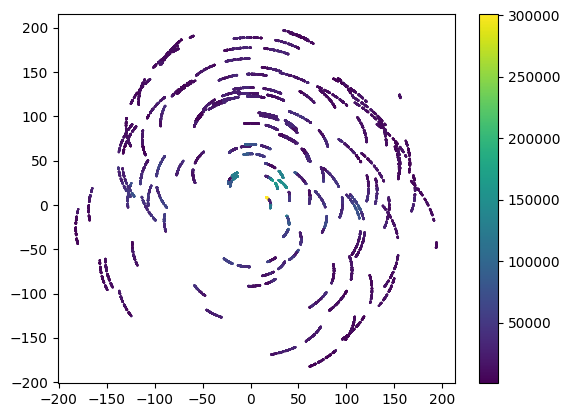

In [23]:
# Check model visibilities
for i, ms in enumerate(dataset.ms_list):
    spw_id = ms.spw_id
    nchans = dataset.spws.nchans[spw_id]
    uvw_broadcast = ms.visibilities.uvw.data[:, np.newaxis, :]
    uvw_broadcast = da.repeat(uvw_broadcast, nchans, axis=1)

    abs_val = da.abs(ms.visibilities.model.data[..., 0])
    plt.scatter(uvw_broadcast[..., 0], uvw_broadcast[..., 1], c=abs_val, s=0.5)

plt.colorbar()